In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF

import Bgolearn.BGOsampling as BGOS 

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


In [2]:
def function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8 + np.random.normal(loc=0.0, scale=0.2, size=None)
    return Y

In [3]:
data = pd.read_csv('data.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

## design virtual samples

In [4]:
virtual_samples = np.linspace(0,11,100)

## define a callable Kriging model

In [5]:
class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() 
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = 0.2**2).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std    

## instantiate Bgolearn

In [6]:
Bgolearn = BGOS.Bgolearn()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


The next datum recomended by Predictive Entropy Search  : 
 x =  [7.88888889]


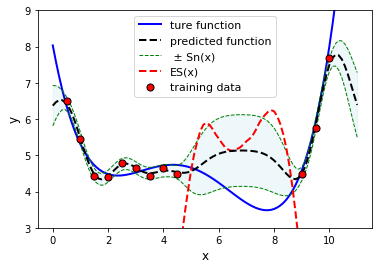

In [7]:
plt.figure()
ax1 = plt.subplot()
ax1.set_ylim([3, 9])
    
y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.PES()*10 + 3,'r--',lw=2,label='ES(x)')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)
plt.savefig('PES-1.png',dpi=800)   

In [8]:
function(7.9)  # x keeps one decimal place

3.5856968063196963

## add datum (7.9,3.5857) into dataset

## 1-th iterations

In [10]:
data = pd.read_csv('data1.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

The next datum recomended by Predictive Entropy Search  : 
 x =  [7.]


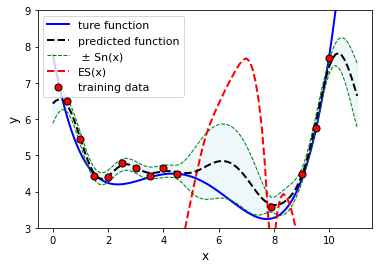

In [11]:
plt.figure()
ax1 = plt.subplot()
ax1.set_ylim([3, 9])
    
y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.PES()*10 + 3,'r--',lw=2,label='ES(x)')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)
plt.savefig('PES-2.png',dpi=800)   

In [12]:
function(7)  # x keeps one decimal place

3.4110228571600403

## add datum (7.0,3.4110) into dataset

## 2-th iterations

In [13]:
data = pd.read_csv('data2.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

The next datum recomended by Predictive Entropy Search  : 
 x =  [6.]


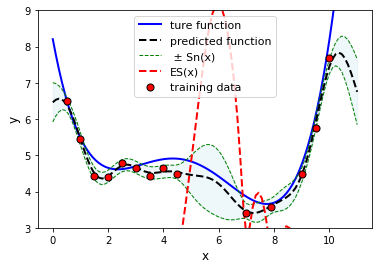

In [14]:
plt.figure()
ax1 = plt.subplot()
ax1.set_ylim([3, 9])
    
y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.PES()*10 + 3,'r--',lw=2,label='ES(x)')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)
plt.savefig('PES-3.png',dpi=800)   

In [15]:
function(6)  # x keeps one decimal place

3.9451379531344535

## add datum (6,3.9451) into dataset

## 3-th iterations

In [16]:
data = pd.read_csv('data3.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

The next datum recomended by Predictive Entropy Search  : 
 x =  [7.22222222]


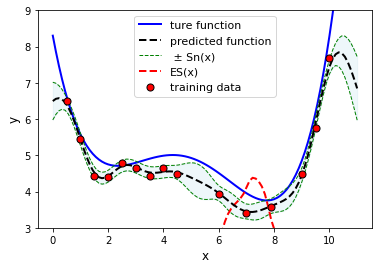

In [17]:
plt.figure()
ax1 = plt.subplot()
ax1.set_ylim([3, 9])
    
y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.PES()*10 + 3,'r--',lw=2,label='ES(x)')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)
plt.savefig('PES-4.png',dpi=800)   

In [18]:
function(7.2)  # x keeps one decimal place

3.7937004970156587

## add datum (7.2,3.7937) into dataset

## 4-th iterations

In [19]:
data = pd.read_csv('data4.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

The next datum recomended by Predictive Entropy Search  : 
 x =  [6.55555556]


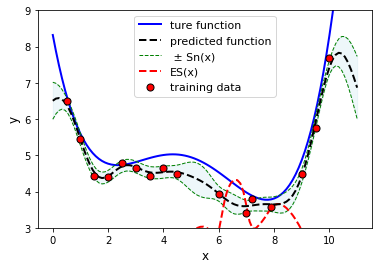

In [20]:
plt.figure()
ax1 = plt.subplot()
ax1.set_ylim([3, 9])
    
y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.PES()*10 + 3,'r--',lw=2,label='ES(x)')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)
plt.savefig('PES-5.png',dpi=800)   

In [21]:
function(6.6)

3.602479303460498

## add datum (6.6,3.6025) into dataset
## 5-th iterations

In [22]:
data = pd.read_csv('data5.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

The next datum recomended by Predictive Entropy Search  : 
 x =  [8.22222222]


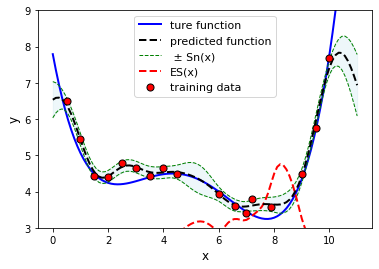

In [23]:
plt.figure()
ax1 = plt.subplot()
ax1.set_ylim([3, 9])
    
y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.PES()*10 + 3,'r--',lw=2,label='ES(x)')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)
plt.savefig('PES-6.png',dpi=800)   

In [24]:
function(8.2)

3.47752563313093

## add datum (8.2,3.4775) into dataset
## 6-th iterations

In [25]:
data = pd.read_csv('data6.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

The next datum recomended by Predictive Entropy Search  : 
 x =  [8.11111111]


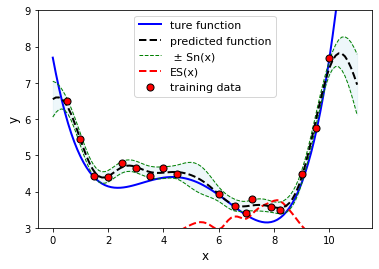

In [26]:
plt.figure()
ax1 = plt.subplot()
ax1.set_ylim([3, 9])
    
y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.PES()*10 + 3,'r--',lw=2,label='ES(x)')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)
plt.savefig('PES-7.png',dpi=800)   

In [27]:
function(8.1)

3.5437922672637714

## add datum (8.1,3.5438) into dataset
## 6-th iterations

In [28]:
data = pd.read_csv('data7.csv')
data_matrix = data.iloc[:,:-1]
Measured_response = data.iloc[:,-1]

The next datum recomended by Predictive Entropy Search  : 
 x =  [7.55555556]


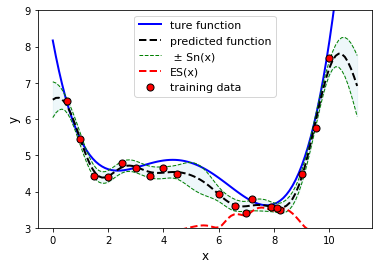

In [29]:
plt.figure()
ax1 = plt.subplot()
ax1.set_ylim([3, 9])
    
y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix,Measured_response,virtual_samples.reshape(-1,1))
ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(virtual_samples,function(virtual_samples),'b',lw=2,label="ture function")
ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

Bgolearn = BGOS.Bgolearn()
# min_search = False:  searching the global maximum
model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
ax1.plot(virtual_samples,model.PES()*10 + 3,'r--',lw=2,label='ES(x)')


plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)
plt.savefig('PES-8.png',dpi=800)   

# x=7.6, satisfy